In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette("Set1")

import warnings
warnings.filterwarnings("ignore")

In [90]:
iris = sns.load_dataset("iris")

In [91]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [92]:
iris.shape

(150, 5)

In [93]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

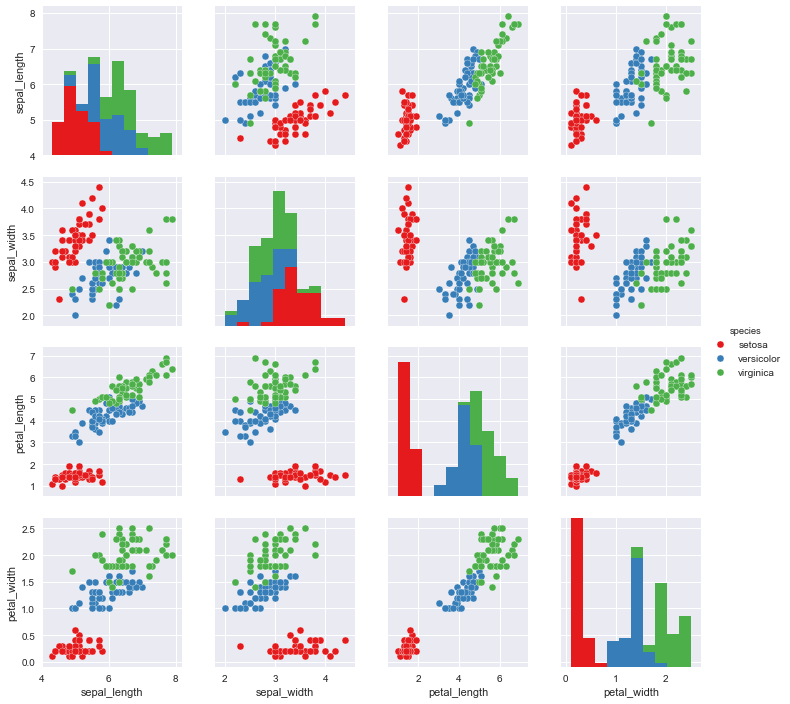

In [94]:
sns.pairplot(iris, hue="species");

In [95]:
iris_dummies = pd.get_dummies(iris, columns =['species'])

In [96]:
iris_dummies.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
71,6.1,2.8,4.0,1.3,0,1,0
112,6.8,3.0,5.5,2.1,0,0,1
27,5.2,3.5,1.5,0.2,1,0,0
99,5.7,2.8,4.1,1.3,0,1,0
46,5.1,3.8,1.6,0.2,1,0,0


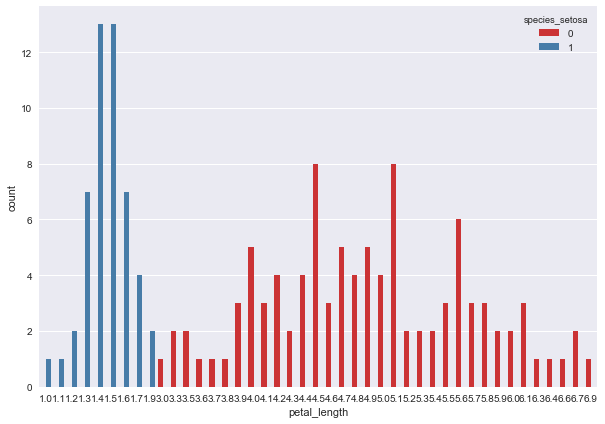

In [97]:
plt.figure(figsize=(10,7))
sns.countplot(x='petal_length',hue='species_setosa',data=iris_dummies)

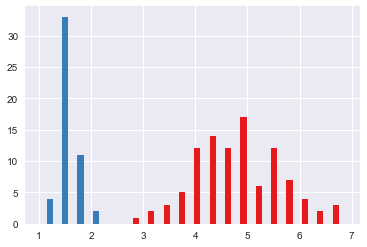

In [98]:
grouped_setosa = iris_dummies.groupby('species_setosa')

hist_setosa= [group.petal_length for _,group in grouped_setosa]

plt.hist(hist_setosa, histtype='bar',bins=20);

In [219]:
def plot_histogram(my_species,feature,n_bins=20):
    """Plot a histogram of the given feature according to a given species."""
    grouped_my_species = iris_dummies.groupby('species_'+my_species)
    hist_my_species= [group[feature] for _,group in grouped_my_species]
    sns.set_style("whitegrid")
    plt.figure(figsize=(10,7))
    plt.hist(hist_my_species, histtype='bar',normed=5,bins=n_bins,label=[my_species,'not '+my_species]);
    plt.yticks([])
    sns.despine()

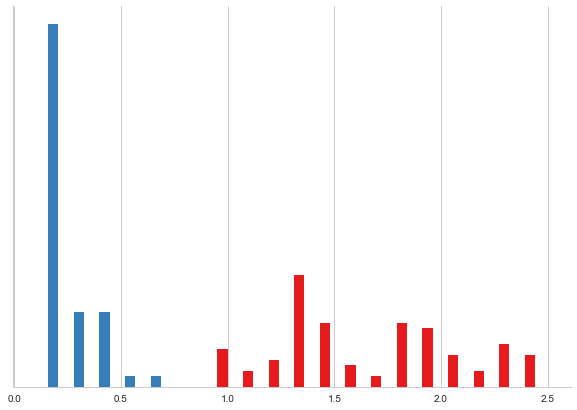

In [220]:
plot_histogram('setosa','petal_width')

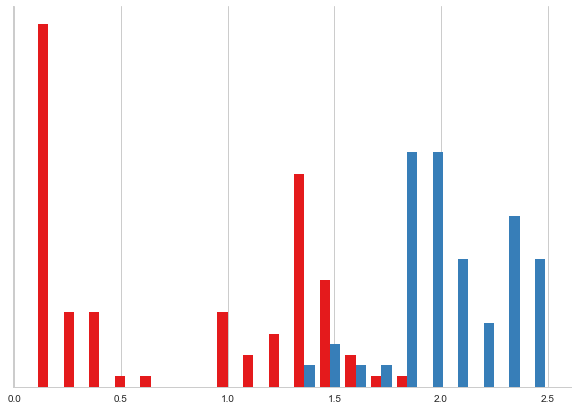

In [221]:
plot_histogram('virginica','petal_width')
domain_petal_width = np.arange(0,3,0.01)
predicted_proba = logistic_classifier.predict_proba(domain_petal_width.reshape(-1,1))[:,0]
plt.plot;

# Logistic regression: guessing virginica knowing the petal width

In [222]:
x = iris['petal_width'].reshape(-1,1)
y= iris_dummies['species_virginica']

In [223]:
import sklearn.model_selection
import sklearn.linear_model

In [224]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.2)

In [225]:
#x_test.shape

In [226]:
#sns.countplot(x=x_train,hue=y_train)

In [227]:
logistic_classifier = sklearn.linear_model.LogisticRegression()

In [228]:
logistic_classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

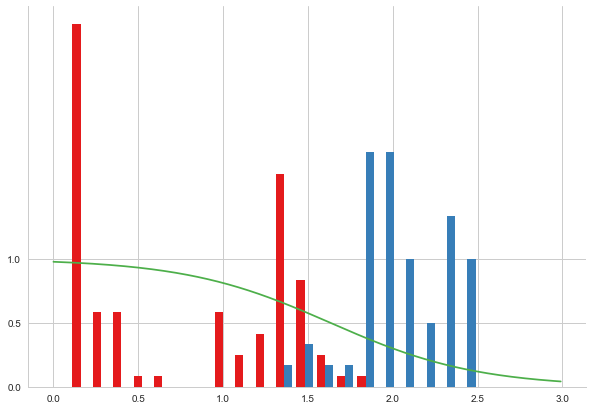

In [229]:
plot_histogram('virginica','petal_width')
domain_petal_width = np.arange(0,3,0.01)
predicted_proba = logistic_classifier.predict_proba(domain_petal_width.reshape(-1,1))[:,0]
plt.plot(domain_petal_width,predicted_proba)
plt.yticks([0,0.5,1])
plt.plot;

# Logistic regression with Keras

In [239]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import Model

In [246]:
model = Sequential()
model.add(Dense(1,input_dim=1))
model.add(Activation('sigmoid'))

In [247]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [248]:
model.fit(x_train,y_train,epochs=100, batch_size=32,verbose=2)

Epoch 1/100
 - 0s - loss: 1.0000 - acc: 0.6833
Epoch 2/100
 - 0s - loss: 0.9963 - acc: 0.6833
Epoch 3/100
 - 0s - loss: 0.9938 - acc: 0.6833
Epoch 4/100
 - 0s - loss: 0.9915 - acc: 0.6833
Epoch 5/100
 - 0s - loss: 0.9895 - acc: 0.6833
Epoch 6/100
 - 0s - loss: 0.9874 - acc: 0.6833
Epoch 7/100
 - 0s - loss: 0.9856 - acc: 0.6833
Epoch 8/100
 - 0s - loss: 0.9838 - acc: 0.6833
Epoch 9/100
 - 0s - loss: 0.9820 - acc: 0.6833
Epoch 10/100
 - 0s - loss: 0.9802 - acc: 0.6833
Epoch 11/100
 - 0s - loss: 0.9785 - acc: 0.6833
Epoch 12/100
 - 0s - loss: 0.9766 - acc: 0.6833
Epoch 13/100
 - 0s - loss: 0.9748 - acc: 0.6833
Epoch 14/100
 - 0s - loss: 0.9731 - acc: 0.6833
Epoch 15/100
 - 0s - loss: 0.9713 - acc: 0.6833
Epoch 16/100
 - 0s - loss: 0.9697 - acc: 0.6833
Epoch 17/100
 - 0s - loss: 0.9679 - acc: 0.6833
Epoch 18/100
 - 0s - loss: 0.9663 - acc: 0.6833
Epoch 19/100
 - 0s - loss: 0.9646 - acc: 0.6833
Epoch 20/100
 - 0s - loss: 0.9630 - acc: 0.6833
Epoch 21/100
 - 0s - loss: 0.9613 - acc: 0.6833
E

# Neural Networks: when linear methods are not sufficient

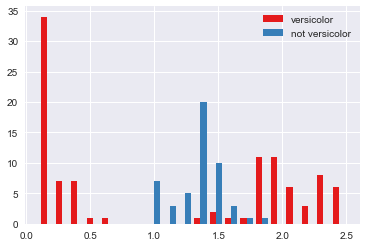

In [101]:
plot_histogram('versicolor','petal_width')

In [102]:
# for name,group in grouped:
#     print(name)
#     print(group)

In [87]:
# plt.figure(figsize=(10,7))
# sns.barplot(x='petal_length',hue='species_setosa',data=iris_dummies)

In [ ]:
colors = ['red', 'blue']
plt.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)